In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import utils

In [2]:
# Get middle C frequency
note_freqs = utils.get_piano_notes()
frequency = note_freqs['C4']

In [3]:
# Pure sine wave
sine_wave = utils.get_sine_wave(frequency, duration=2, amplitude=2048)
wavfile.write('database/audio/pure_c.wav', rate=44100, data=sine_wave.astype(np.int16))

In [5]:
# Load data from wav file
sample_rate, middle_c = wavfile.read('database/input/piano_c.wav')

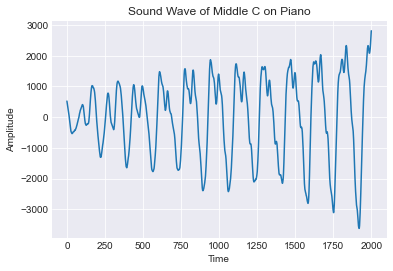

In [6]:
# Plot sound wave
plt.plot(middle_c[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Middle C on Piano')
plt.grid()
plt.savefig('database/image/piano_sound_wave.jpg')

In [7]:
# FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c) 

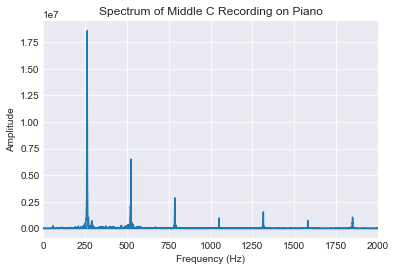

In [8]:
# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Piano')
plt.xlim((0, 2000))
plt.grid()
plt.savefig('database/image/spectrum.jpg')

In [9]:
# Get positive frequency
idx = np.where(freq > 0)[0]
freq = freq[idx]
sp = sp[idx]

In [10]:
# Get dominant frequencies
sort = np.argsort(-abs(sp.real))[:100]
dom_freq = freq[sort]

In [11]:
# Round and calculate amplitude ratio
freq_ratio = np.round(dom_freq/frequency)
unique_freq_ratio = np.unique(freq_ratio)
amp_ratio = abs(sp.real[sort]/np.sum(sp.real[sort]))
factor = np.zeros((int(unique_freq_ratio[-1]), ))
for i in range(factor.shape[0]):
    idx = np.where(freq_ratio==i+1)[0]
    factor[i] = np.sum(amp_ratio[idx])
factor = factor/np.sum(factor)


In [12]:
# Construct harmonic series
note = utils.apply_overtones(frequency, duration=2.5, factor=factor)

In [13]:
# Apply smooth ADSR weights
weights = utils.get_adsr_weights(frequency, duration=2.5, length=[0.05, 0.25, 0.55, 0.15],
                           decay=[0.075,0.02,0.005,0.1], sustain_level=0.1)

In [14]:
# Write to file
data = note*weights
data = data*(4096/np.max(data)) # Adjusting the Amplitude 
wavfile.write('database/audio/synthetic_c.wav', sample_rate, data.astype(np.int16))